In [169]:
from library import *
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
df = pd.read_csv('data/anon_cust_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [111]:
# df.sample(10)

##### Bringing it together:
Try to find out why customers churn
Can we predict which customers will churn?
Hint: The below can be useful
Coefficients from logistic models
Feature importance from tree based models
(edited)

In [112]:
df = df.drop(columns="Unnamed: 0")

In [113]:
df['TotalCharges'] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [114]:
df.loc[:, df.select_dtypes(include="object").columns] = df.select_dtypes(include="object").astype("string")


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [116]:
df["TotalCharges"].isnull().sum()

np.int64(11)

In [117]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


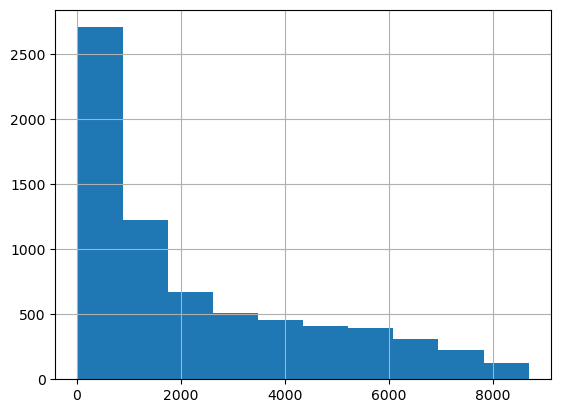

In [118]:
df['TotalCharges'].hist()
plt.show()

In [119]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [120]:
df['TotalCharges'].sort_values(ascending=True)

1654    18.80
1151    18.85
6489    18.85
4939    18.90
583     19.00
        ...  
3826      NaN
4380      NaN
5218      NaN
6670      NaN
6754      NaN
Name: TotalCharges, Length: 7043, dtype: float64

In [121]:
df = df.astype({col: "string" for col in df.select_dtypes(include="object").columns})

In [122]:
df_outlierless.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,new_col
count,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03
mean,0.162400,32.421786,64.798208,2283.300441,8.209840e-17
std,0.368844,24.545260,30.085974,2266.771362,1.000000e+00
min,0.000000,1.000000,18.250000,18.800000,-9.989982e-01
25%,0.000000,9.000000,35.587500,401.450000,-8.301898e-01
50%,0.000000,29.000000,70.350000,1397.475000,-3.907873e-01
75%,0.000000,55.000000,89.862500,3794.737500,6.667797e-01
max,1.000000,72.000000,118.750000,8684.800000,2.824061e+00


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   string 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   string 
 3   Dependents        7043 non-null   string 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   string 
 6   MultipleLines     7043 non-null   string 
 7   InternetService   7043 non-null   string 
 8   OnlineSecurity    7043 non-null   string 
 9   OnlineBackup      7043 non-null   string 
 10  DeviceProtection  7043 non-null   string 
 11  TechSupport       7043 non-null   string 
 12  StreamingTV       7043 non-null   string 
 13  StreamingMovies   7043 non-null   string 
 14  Contract          7043 non-null   string 
 15  PaperlessBilling  7043 non-null   string 
 16  PaymentMethod     7043 non-null   string 


In [124]:
def model(df):
    # 3
    X = df.drop(columns= 'Churn')
    y = df['Churn']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    #4
    df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

    #5
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
    numeric_transformer = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="mean")),      # Fill missing values with the mean
            ("scaler", StandardScaler())                        # Scale values to 0-1
        ])

    categorical_transformer = Pipeline(steps=[
            ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
        ])
        # Step 9: Combine into a ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ])
        # Step 10: Create the full pipeline with preprocessing + model
    model_pipeline = Pipeline(steps=[
            ("preprocess", preprocessor),
            ("model", LogisticRegression())
        ])
        # Step 11: Fit the pipeline on the training data
    model_pipeline.fit(X_train, y_train)
        # Step 12: Evaluate or predict on the test set
    score = model_pipeline.score(X_test, y_test)
    y_pred = model_pipeline.predict(X_test)
    print(f"Test Accuracy Score for LogRegres: {score:.4f}")

     # ===============================
    # 🔥 GET COEFFICIENTS (this part)
    # ===============================
    # Get logistic regression model
    logreg = model_pipeline.named_steps["model"]

    # Get feature names from preprocessor
    feature_names = model_pipeline.named_steps["preprocess"].get_feature_names_out()

    # Combine features + coefficients into a dataframe
    coef_df = pd.DataFrame({
        "feature": feature_names,
        "coefficient": logreg.coef_[0]
    }).sort_values("coefficient", ascending=False)

    print("\n--- Logistic Regression Coefficients ---")
    print(coef_df)

    return coef_df

In [125]:
model(df)

Test Accuracy Score for LogRegres: 0.8219

--- Logistic Regression Coefficients ---
                                         feature  coefficient
3                              num__TotalCharges     0.615945
36                  cat__Contract_Month-to-month     0.597297
16              cat__InternetService_Fiber optic     0.240878
43           cat__PaymentMethod_Electronic check     0.198532
18                        cat__OnlineSecurity_No     0.169305
2                            num__MonthlyCharges     0.138876
27                           cat__TechSupport_No     0.128147
13           cat__MultipleLines_No phone service     0.059840
10                          cat__PhoneService_No     0.059840
0                             num__SeniorCitizen     0.059075
21                          cat__OnlineBackup_No     0.040085
35                      cat__StreamingMovies_Yes     0.038421
40                     cat__PaperlessBilling_Yes     0.022654
32                          cat__StreamingTV_Yes

,feature,coefficient
3,num__TotalCharges,0.615945
36,cat__Contract_Month-to-month,0.597297
16,cat__InternetService_Fiber optic,0.240878
43,cat__PaymentMethod_Electronic check,0.198532
18,cat__OnlineSecurity_No,0.169305
2,num__MonthlyCharges,0.138876
27,cat__TechSupport_No,0.128147
13,cat__MultipleLines_No phone service,0.059840
10,cat__PhoneService_No,0.059840
0,num__SeniorCitizen,0.059075


In [208]:
def tree_models(df):
    df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())
    
    X = df.drop(columns='Churn')
    y = df['Churn']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first"))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

    pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestClassifier(random_state=42))
    ])
    
    param_grid = {
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [10, 20, None],
        "model__min_samples_split": [5, 10],
        "model__min_samples_leaf": [2, 4],
        "model__class_weight": ["balanced", None]
    }
    
    grid_search = GridSearchCV(
        pipeline, param_grid, 
        cv=5,
        scoring="precision",
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"Best CV Score: {grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    score = best_model.score(X_test, y_test)
    
    print(f"Test Accuracy Score: {score:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    rf_model = best_model.named_steps["model"]
    feature_names = best_model.named_steps["preprocess"].get_feature_names_out()
    
    importance_df = pd.DataFrame({
        "feature": feature_names,
        "importance": rf_model.feature_importances_
    }).sort_values("importance", ascending=False)
    
    print("\n--- Top 10 Most Important Features ---")
    print(importance_df.head(10))
    
    return importance_df, best_model

In [209]:
tree_models(df)

c:\Users\torie\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best CV Score: nan
Test Accuracy Score: 0.7715

Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.78      0.83      1035
         Yes       0.55      0.75      0.64       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.80      0.77      0.78      1409


Confusion Matrix:
[[806 229]
 [ 93 281]]

--- Top 10 Most Important Features ---
                                      feature  importance
1                                 num__tenure    0.173414
3                           num__TotalCharges    0.144105
2                         num__MonthlyCharges    0.106256
25                     cat__Contract_Two year    0.102187
10           cat__InternetService_Fiber optic    0.070085
28        cat__PaymentMethod_Electronic check    0.048782
24                     cat__Contract_One year    0.039907
13                    cat__OnlineSecurity_Yes    0.03845

(                                       feature  importance
 1                                  num__tenure    0.173414
 3                            num__TotalCharges    0.144105
 2                          num__MonthlyCharges    0.106256
 25                      cat__Contract_Two year    0.102187
 10            cat__InternetService_Fiber optic    0.070085
 28         cat__PaymentMethod_Electronic check    0.048782
 24                      cat__Contract_One year    0.039907
 13                     cat__OnlineSecurity_Yes    0.038454
 19                        cat__TechSupport_Yes    0.026283
 16   cat__DeviceProtection_No internet service    0.019154
 26                   cat__PaperlessBilling_Yes    0.018066
 20        cat__StreamingTV_No internet service    0.016483
 14       cat__OnlineBackup_No internet service    0.015668
 12     cat__OnlineSecurity_No internet service    0.015605
 6                          cat__Dependents_Yes    0.015550
 4                             cat__gend